In [22]:
# Homework 6
# Orbit COM function
# Sammie Mackie

# import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import astropy.units as u
from CenterOfMassHW6Edit import CenterOfMass
from ReadFile import Read

In [2]:
# Function will calculate the postion and velocity of the COM of a galaxy for
# a range of snapshots
def OrbitCOM(galaxy, start, end, n):
    # Inputs:
    #    galaxy = name of the galaxy (MW, M31, or M33)
    #    start = the number of the first snapshot to be read in
    #    end = the number of the last snapshot to be read in
    #    n = an integer indicating the intervals over which the the COM will be returned
    # Returns:
    #    outputs a file of time, positions, and velocities, but doesn't actaully return anything
    
    #file that will store the orbit
    fileout = 'Orbit_' + galaxy + '.txt'
    
    # different volume decrease for M33
    if 'M33' not in galaxy:
        delta = 0.1
        VolDec = 2
    else:
        delta = 0.1
        VolDec = 4
    
    # an array of snap values
    snap_ids = np.arange(start, end, n)
    
    # array will store time, x, y, z, vx, vy, and vz
    orbit = np.zeros([len(snap_ids), 7])
     
    # Making the filename (most of this is from MassProfile)    
    for i, snap_id in enumerate(snap_ids):
        # Adds extra 0's to start of the inputted snap number
        snapnum = '000' + str(snap_id)
        # Gets rid of everything but the last 3 digits
        snapnum = snapnum[-3:]
        # Constructs the filename (ex. MW_000.txt) and saves it to a global property
        # The galaxy + "/" is for my directory specifically- 
        # I have the snapshots saved in folders for each galaxy
        filename = galaxy + "/" + "%s_"%(galaxy) + snapnum + ".txt"
        
        # making the center of mass object (disk particles = 2)
        COM = CenterOfMass(filename,2)
        
        # storing the time in the first column of orbit
        orbit[i,0] = COM.time.value / 1000
        
        # storing the position and velocity arrays
        COMP = COM.COM_P(delta, VolDec)
        COMV = COM.COM_V(COMP[0], COMP[1], COMP[2])
        
        # saving the positions and velocities to the right spot in the orbit array
        # there's probably an easier way to do this
        orbit[i,1] = COMP[0].value
        orbit[i,2] = COMP[1].value
        orbit[i,3] = COMP[2].value
        orbit[i,4] = COMV[0].value
        orbit[i,5] = COMV[1].value
        orbit[i,6] = COMV[2].value
        
    np.savetxt(fileout, orbit, header='t x y z vx vy vz', comments='#', 
               fmt=['%.2f', '%.2f', '%.2f', '%.2f', '%.2f', '%.2f', '%.2f'])
        
    return

In [4]:
OrbitCOM('MW',0,800,5)

In [5]:
OrbitCOM('M31',0,800,5)

In [6]:
OrbitCOM('M33',0,800,5)

In [12]:
MWorbit = np.genfromtxt('Orbit_MW.txt',dtype=None,names=True,skip_header=0)
M31orbit = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True,skip_header=0)
M33orbit = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True,skip_header=0)

In [13]:
# Function will calculate the difference between two vectors and the magnitude of that difference
def Magnitude(a1, b1, c1, a2, b2, c2):
    # Inputs:
    #    a1, b1, c1 = array of components of vector 1
    #    a2, b2, c2 = array of components of vector 2
    # Returns:
    #    an array of the magnitude of the difference between two vectors
    
    # difference between each component
    A = a1 - a2
    B = b1 - b2
    C = c1 - c2
    
    # the magnitude
    mag = np.sqrt(A**2 + B**2 + C**2)
    
    return np.around(mag,2)

In [18]:
# separations between the galaxies
SepM31_MW = Magnitude(M31orbit['x'], M31orbit['y'], M31orbit['z'], MWorbit['x'], MWorbit['y'], MWorbit['z'])
SepM33_M31 = Magnitude(M33orbit['x'], M33orbit['y'], M33orbit['z'], M31orbit['x'], M31orbit['y'], M31orbit['z'])

# relative velocities of galaxies
VelM31_MW = Magnitude(M31orbit['vx'], M31orbit['vy'], M31orbit['vz'], MWorbit['vx'], MWorbit['vy'], MWorbit['vz'])
VelM33_M31 = Magnitude(M33orbit['vx'], M33orbit['vy'], M33orbit['vz'], M31orbit['vx'], M31orbit['vy'], M31orbit['vz'])

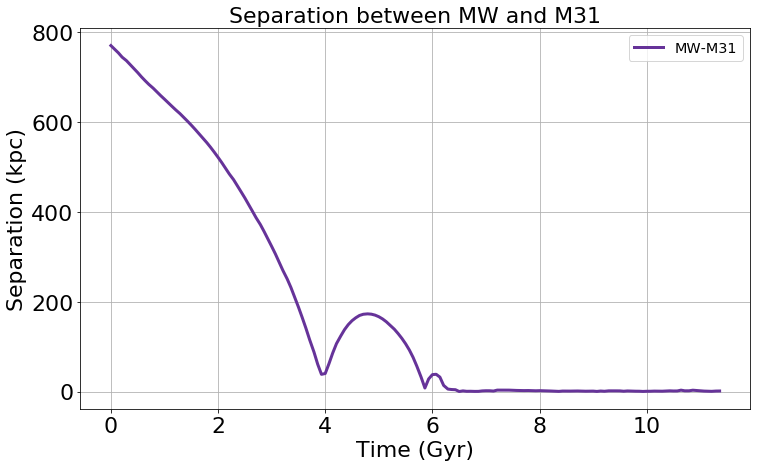

In [28]:
# Plotting code from HW 5
fig,ax = plt.subplots(figsize=(12,7))

# Plotting the data
plt.plot(MWorbit['t'], SepM31_MW, linewidth = 3, color = 'rebeccapurple', label='MW-M31')

# Adding a plot title
plt.title('Separation between MW and M31', fontsize=22, loc='center', pad=None)

# Adding axis labels
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Separation (kpc)', fontsize=22)

# Adjusting tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Displaying a grid
plt.grid(True, which="both")

# Adding a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Showing the plot
plt.show()

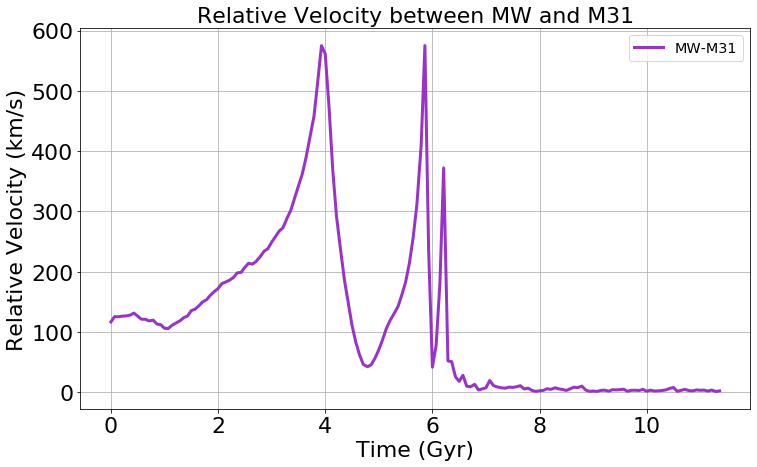

In [31]:
# Plotting code from HW 5
fig,ax = plt.subplots(figsize=(12,7))

# Plotting the data
plt.plot(MWorbit['t'], VelM31_MW, linewidth = 3, color = 'darkorchid', label='MW-M31')

# Adding a plot title
plt.title('Relative Velocity between MW and M31', fontsize=22, loc='center', pad=None)

# Adding axis labels
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Relative Velocity (km/s)', fontsize=22)

# Adjusting tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Displaying a grid
plt.grid(True, which="both")

# Adding a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Showing the plot
plt.show()

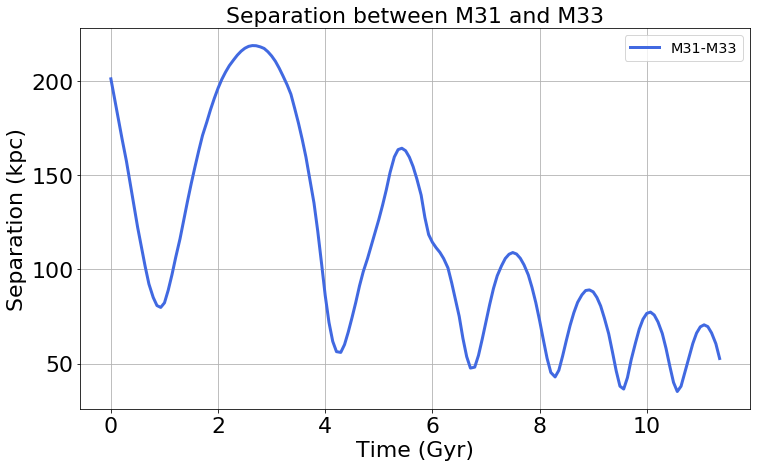

In [29]:
# Plotting code from HW 5
fig,ax = plt.subplots(figsize=(12,7))

# Plotting the data
plt.plot(M33orbit['t'], SepM33_M31, linewidth = 3, color = 'royalblue', label='M31-M33')

# Adding a plot title
plt.title('Separation between M31 and M33', fontsize=22, loc='center', pad=None)

# Adding axis labels
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Separation (kpc)', fontsize=22)

# Adjusting tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Displaying a grid
plt.grid(True, which="both")

# Adding a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Showing the plot
plt.show()

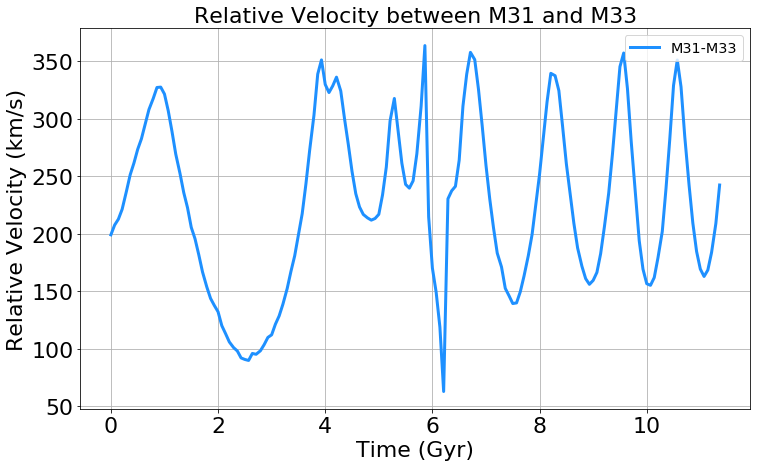

In [32]:
# Plotting code from HW 5
fig,ax = plt.subplots(figsize=(12,7))

# Plotting the data
plt.plot(M33orbit['t'], VelM33_M31, linewidth = 3, color = 'dodgerblue', label='M31-M33')

# Adding a plot title
plt.title('Relative Velocity between M31 and M33', fontsize=22, loc='center', pad=None)

# Adding axis labels
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Relative Velocity (km/s)', fontsize=22)

# Adjusting tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Displaying a grid
plt.grid(True, which="both")

# Adding a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Showing the plot
plt.show()

# Question 1

The Milky Way and Andromeda will have ~2 close encounters before merging

# Question 2

The peaks of the relative velocity graphs correspond with the troughs in the separation graphs. (galaxies moving the fastest when they're the closest)

# Question 3

The MW and M31 seem to completely merge around 6.25 Gyr from the present. M33's orbit continues to decay, but it still orbits for several billion years after the merger.

# Question 4

From eyeballing the M31-M33 separation graph

7.5 gyr   110 kpc

-1.4      -22

8.9 gyr   88 kpc

-1.1      -13

10  gyr   75 kpc

-1.1      -5

11.1 gyr  70 kpc

out of brain power